<a href="https://colab.research.google.com/github/rashmi0852/Airline_Passenger_Refferal_Prediction/blob/main/Airline_Referal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Airline Passenger Refferal Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
#####  **Name**       - Rashmiranjan Nayak


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/rashmi0852/Airline_Passenger_Refferal_Prediction.git


# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [421]:
# Import Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [422]:
# Load Dataset
airline_df=pd.read_excel("/content/data_airline_reviews.xlsx")

### Dataset First View

In [423]:
# Dataset First 5 rows look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [424]:
#Dataset Last 5 rows look
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [425]:
# Dataset Rows & Columns count

# Count the rows and columns in the airline dataset
num_rows, num_cols = airline_df.shape

print("Total rows in dataset=",num_rows)

print("Total columns in dataset=",num_cols)


Total rows in dataset= 131895
Total columns in dataset= 17


### Dataset Information

In [426]:
# Dataset Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [427]:
#keep original copy safe
airline_data=airline_df.copy()

In [428]:
# Dataset Duplicate Value Count

duplicate_values=airline_data.duplicated().sum()
print("Duplicate rows in dataset:",duplicate_values)

Duplicate rows in dataset: 70711


In [429]:
#Drop duplicate records
airline_data.drop_duplicates(inplace=True)

In [430]:
# Dataset Rows & Columns count

# Count the rows and columns in the airline dataset
num_rows, num_cols = airline_data.shape

print("Total rows in dataset=",num_rows)


Total rows in dataset= 61184


#### Missing Values/Null Values

In [431]:
# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "--"*15)
print(airline_data.isnull().sum())

Missing Values in each column
------------------------------
airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64


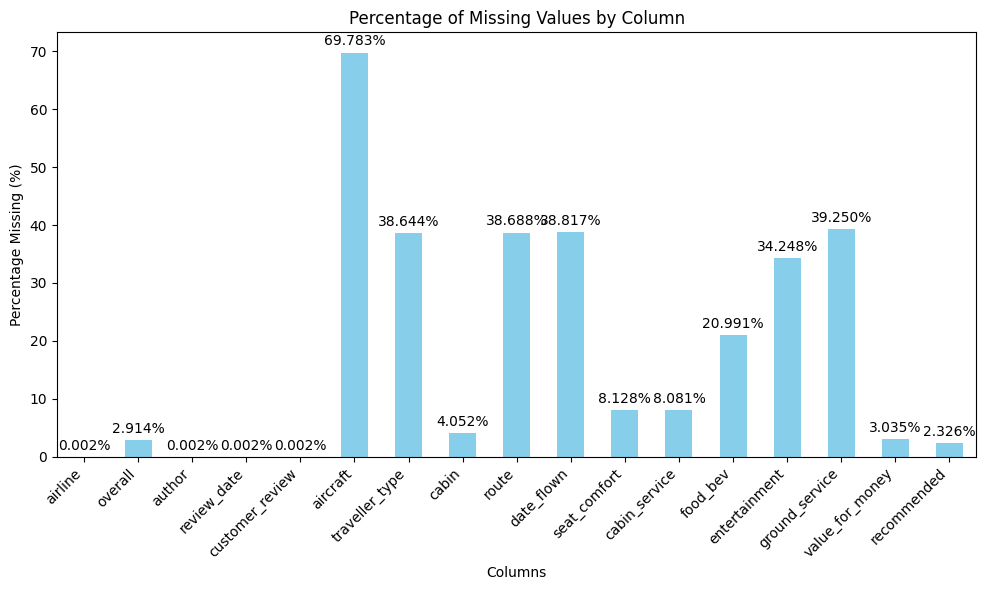

In [432]:
# Visualizing the missing values

#Calculate missing persentage for each column
missing_percent =round( (airline_data.isnull().mean())*100,3)


#Bar plot
plt.figure(figsize=(10, 6))
bars=missing_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45,ha="right")

# Add data labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


### What did you know about your dataset?

By exploring Airline Review dataset following insights were found:-
* The dataset contains a total of 131,895 records with 17 features.

* There are 70,711 duplicate records present in the dataset.
* Each column contains some missing values (NaN). The Aircraft column contains the highest amount of missing values, with approximately 70% of the data missing. In contrast, the airline, author, review_date, and customer_review columns contain the least amount of missing data (approximately 0.002%), which is nearly equal to zero.

* There are 7 columns with numeric data types (float64), which likely represent ratings or scores for different aspects of the airline experience.

* The remaining 10 columns have the object data type, which can include categorical variables and textual data.

* Out of the object columns, the review_date & date_flown feature originally represents a Date data type but is in the form of a categorical type.

After removing **70711** dulpicates ,records reduced to **61184** & features remains same as **17**.

## ***2. Understanding Your Variables***

In [433]:
# Dataset Columns
print(airline_data.columns)


Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')


In [434]:
# # Dataset Describe For Numerical Features
airline_data.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [435]:
# Dataset Describe For categorical Features
airline_data.describe(exclude="float")

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,recommended
count,61183,61183,61183,61183,18488,37540,58705,37513,37434,59761
unique,81,44069,3015,61172,2088,4,4,24549,63,2
top,Spirit Airlines,Anders Pedersen,19th January 2015,I flew from Chicago O'Hare to Dublin and from ...,A320,Solo Leisure,Economy Class,BKK to LHR,August 2015,no
freq,2871,93,198,2,2130,13935,45171,31,1127,31268


### Variables Description

* **airline**: Name of the airline.

* **overall**:  Overall rating (1 - 10).

* **author**: Author of the trip

* **review date**: Date of the Review

* **customer review**: Review of the customers in free text format

* **aircraft**: Type of the aircraft

* **traveller type**: Type of traveler (e.g. business, leisure)

* **cabin**: Cabin at the flight(e.g Economy,business)
* **route**: The flight route

* **date flown**: The date the flight was taken

* **seat comfort**: Rating for seat comfort (1-5)

* **cabin service**: Rating for cabin service (1-5)

* **foodbev**: Rating for food and beverage (1-5)

* **entertainment**: Rating for entertainment (1-5)

* **groundservice**: Rating for ground service (1-5)

* **valueformoney**: Rating for value for money (1-5)
* **recommended**:  Whether the customer recommends the airline (categorical, possibly binary).




### Check Unique Values for each variable.

In [436]:
# List of categorical columns
categorical_columns = ['airline', 'author', 'review_date', 'aircraft', 'traveller_type',
                       'cabin', 'route', 'date_flown', 'recommended']
for column in categorical_columns:

  # Select the "airline" column
  airline_column = airline_data[column]

  # Get value counts
  value_counts = airline_column.value_counts()

  # Get the number of unique values
  nunique = airline_column.nunique()

  # Print the results
  print("--"*50)
  print("Column Name:",column)
  print("\nNumber of Unique Values:",nunique)
  print("\nValue Counts:")
  print(value_counts)
  print("--"*50)
  print("\n")


----------------------------------------------------------------------------------------------------
Column Name: airline

Number of Unique Values: 81

Value Counts:
Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Column Name: author

Number of Unique Values: 44069

Value Counts:
Anders Pedersen    93
Michel Perrin      89
Jonathan Rodden    81
T Eldem            56
John Curtain       52
                   ..
A Robbins           1
P Devans            1
T Dayes             1
M Cohn              1
Kasper

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Handeling Missing values

In [437]:
#print Missing persentage
print(missing_percent)


airline             0.002
overall             2.914
author              0.002
review_date         0.002
customer_review     0.002
aircraft           69.783
traveller_type     38.644
cabin               4.052
route              38.688
date_flown         38.817
seat_comfort        8.128
cabin_service       8.081
food_bev           20.991
entertainment      34.248
ground_service     39.250
value_for_money     3.035
recommended         2.326
dtype: float64


In [438]:
#Drop missing value records which are less than 5%
airline_data.dropna(subset=["airline","overall","author","review_date","customer_review",
                            "cabin","value_for_money","recommended"],inplace=True)

In [439]:
#Drop aircraft column as 70% if its data are missing
airline_data.drop("aircraft",inplace=True,axis=1)

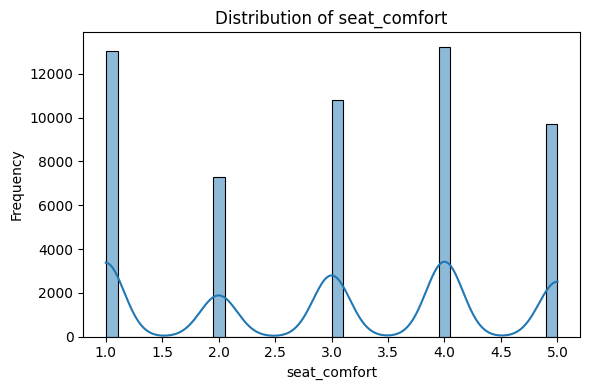

Column: seat_comfort
Median Imputation: 3.00
Mean Imputation: 2.95
Mode Imputation: 1.00


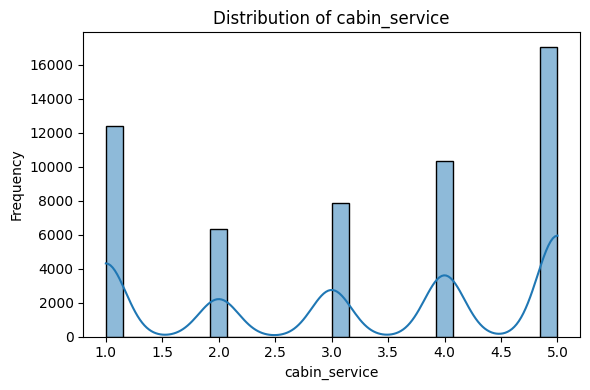

Column: cabin_service
Median Imputation: 3.00
Mean Imputation: 3.19
Mode Imputation: 5.00


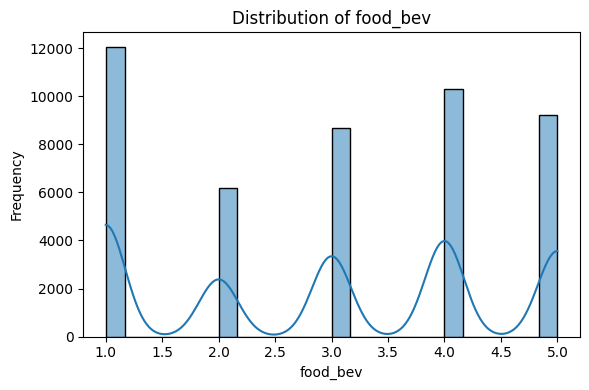

Column: food_bev
Median Imputation: 3.00
Mean Imputation: 2.91
Mode Imputation: 1.00


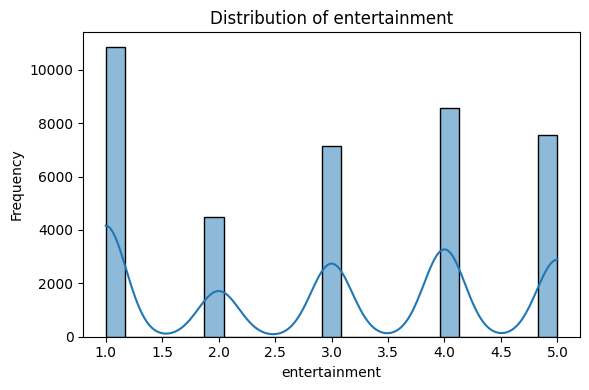

Column: entertainment
Median Imputation: 3.00
Mean Imputation: 2.86
Mode Imputation: 1.00


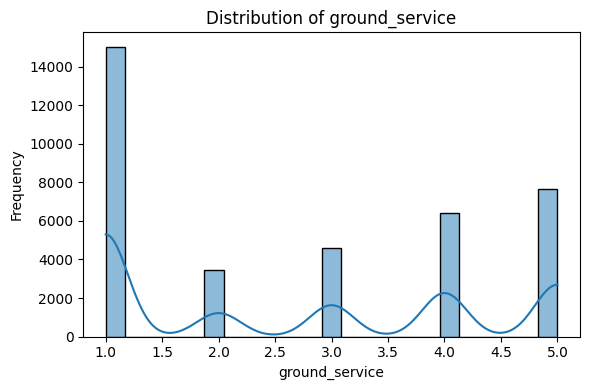

Column: ground_service
Median Imputation: 3.00
Mean Imputation: 2.69
Mode Imputation: 1.00


In [440]:
# List of numerical columns analyze and impute
numeric_missing = ['seat_comfort', 'cabin_service', 'food_bev',
                      'entertainment', 'ground_service']

# Create distribution plots for each column
for column in numeric_missing :
    plt.figure(figsize=(6, 4))
    sns.histplot(data=airline_data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Calculate statistics for imputation
    median_value = airline_df[column].median()
    mean_value = airline_df[column].mean()
    mode_value = airline_df[column].mode()[0]

    print(f"Column: {column}")
    print(f"Median Imputation: {median_value:.2f}")
    print(f"Mean Imputation: {mean_value:.2f}")
    print(f"Mode Imputation: {mode_value:.2f}")
    print("="*50)


In [441]:
#Handel numerical missing columns
# Create a SimpleImputer with strategy='median' for numerical columns
numeric_imputer = SimpleImputer(strategy='median')


# Apply the imputer to the numeric columns with missing values
airline_data[numeric_missing] = numeric_imputer.fit_transform(airline_data[numeric_missing])

#convert  numeric missing column value to integer
numeric=['seat_comfort', 'cabin_service', 'food_bev',"overall",'value_for_money',
                      'entertainment', 'ground_service']
airline_data[numeric]=airline_data[numeric].astype("int")



In [442]:
#Handel categorical missing columns
# Create a SimpleImputer with strategy='most_frequent' for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# List of categorical columns with missing values
categorical_missing = ['traveller_type', 'route', 'date_flown']

# Apply the imputer to the categorical columns with missing values
airline_data[categorical_missing] = categorical_imputer.fit_transform(airline_data[categorical_missing])





In [443]:
airline_data.isnull().sum()

airline            0
overall            0
author             0
review_date        0
customer_review    0
traveller_type     0
cabin              0
route              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

#### Convert to Date datatype

In [444]:
# Convert "review_date" to date data type
airline_data['review_date'] = pd.to_datetime(airline_data['review_date'], errors='coerce')

# Extract month as a numerical value from "review_date"
airline_data['review_month'] = airline_data['review_date'].dt.month



In [445]:
# Convert "date_flown" to date data type
airline_data['date_flown'] = pd.to_datetime(airline_data['date_flown'], errors='coerce')


# Extract month as a numerical value from "date_flown"
airline_data['flown_month'] = airline_data['date_flown'].dt.month



In [446]:
airline_data.shape

(56933, 18)

### What all manipulations have you done and insights you found?

 I addressed the issue of missing values by dropping records where the missing values were less than 5%. For the remaining columns, I utilized a strategy that considered the distribution of the data. Specifically, for numerical columns, I imputed missing values with the median, and for categorical columns, I filled in missing values with the most frequently occurring category. Additionally, due to a high percentage of missing values, I made the decision to drop the 'aircraft' column.

Furthermore, I converted the 'review_date' and 'date_flown' columns from object data type to date data type, enabling me to perform temporal analyses. As a result, I derived four new columns: 'flown_year,' 'flown_month,' 'review_month,' and 'review_year.'

These data preprocessing steps led to a reduction in the number of records from 61,184 to 56,933, while increasing the number of features from 17 to 18."


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

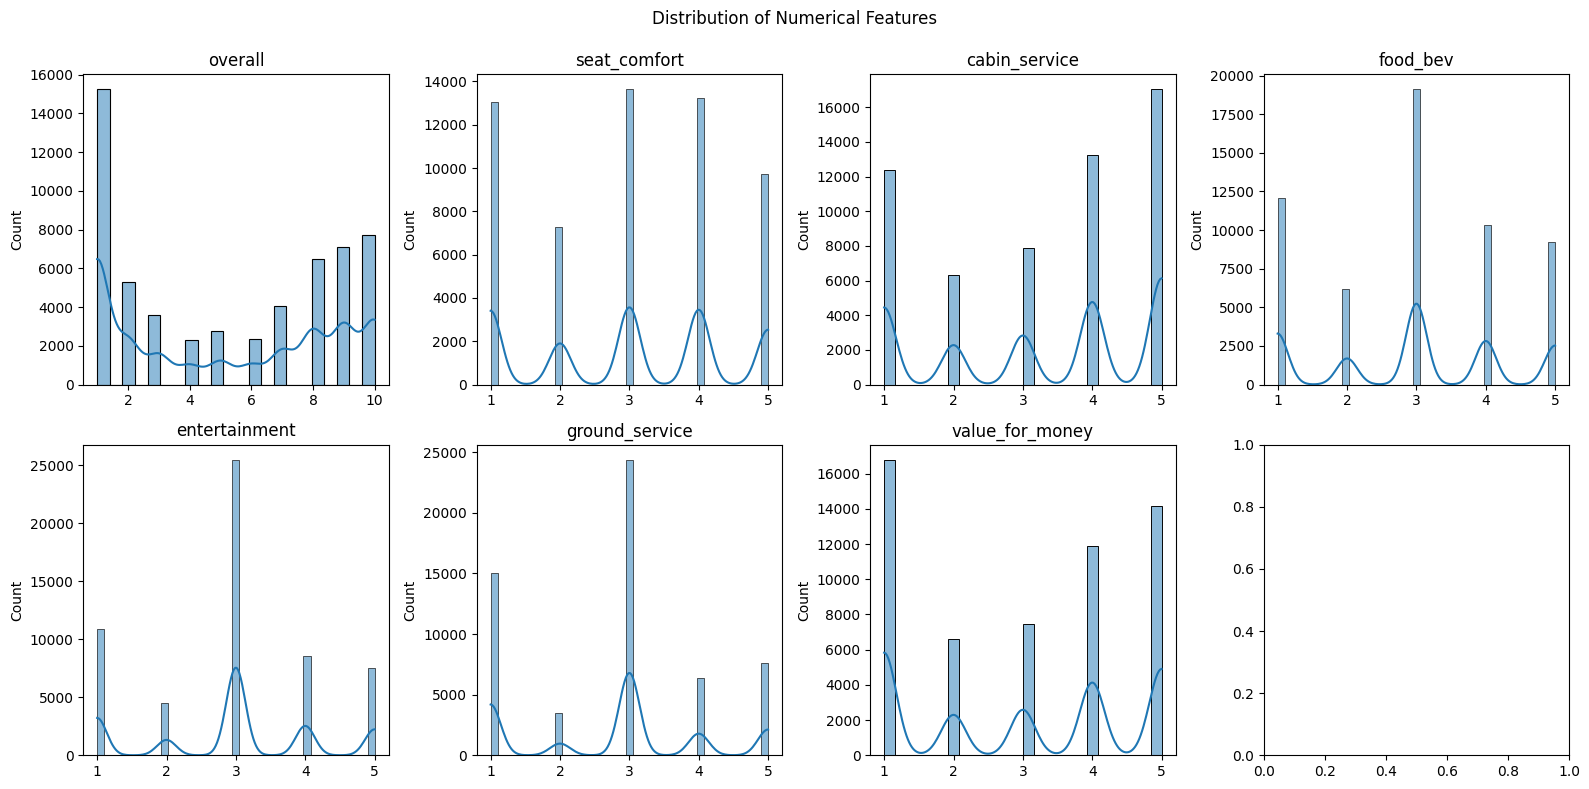

In [448]:
# Chart - 1 visualization code
#Question -1:Find Distribution of numerical features


# List of numerical columns
numerical_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Distribution of Numerical Features')

# Plot histograms for numerical features
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 4)
    sns.histplot(data=airline_data, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

I chose histograms with kernel density estimates (KDE) for visualizing numerical features because they effectively represent data distributions, making it easy to observe patterns, central tendencies, and spread. Histograms are versatile, commonly used, and allow for side-by-side comparisons when multiple features need visualization.

##### 2. What is/are the insight(s) found from the chart?

Certainly, here's the corrected version of the insights based on the histograms:

1. **Overall:** The overall rating feature shows a higher frequency of ratings around 1, indicating that many customers tend to give low ratings. Additionally, there are peaks at ratings 8, 9, and 10, suggesting that some customers provide very high ratings. This distribution indicates that customers have polarized opinions, with a significant number expressing extreme satisfaction or dissatisfaction.

2. **Seat Comfort:** The distribution for seat comfort ratings appears relatively uniform, with similar frequencies across ratings from 1 to 5. This suggests that customers have diverse opinions when it comes to seat comfort, with no single rating dominating.

3. **Cabin Service:** The cabin service ratings also exhibit a relatively uniform distribution across ratings from 1 to 5, indicating varied opinions about cabin service quality.

4. **Food and Beverage:** For the food and beverage ratings, there is a noticeable peak at rating 3, suggesting that a significant number of customers find the food and beverage quality satisfactory. However, there are also lower frequencies at the extremes, indicating both positive and negative opinions.

5. **Entertainment:** Entertainment ratings have a relatively high frequency at rating 3, similar to seat comfort and cabin service. This suggests that customers have mixed feelings about the entertainment offerings on flights.

6. **Ground Service:** Ground service ratings show a distribution similar to entertainment, with higher frequencies around rating 3. This indicates that customers generally have more neutral opinions about ground service compared to other aspects of the flight.

7. **Value for Money:** The distribution of value for money ratings is relatively high at rating 1 and lower at rating 2, then gradually increases for higher ratings. This suggests that customers have diverse opinions about whether they perceive their flights as a good value for money.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the histograms can potentially help in creating a positive business impact, but there are also insights that may raise concerns related to negative growth. Let's analyze both aspects:

**Positive Business Impact:**
1. **Overall Ratings Peaks:** The presence of peaks in overall ratings at 8, 9, and 10 indicates that there is a significant number of highly satisfied customers. This can be leveraged for marketing and promotion as positive customer experiences can be highlighted to attract more customers.

2. **Diverse Opinions:** The relatively uniform distributions for seat comfort, cabin service, and other features suggest that customers have diverse opinions. Understanding these diverse preferences can help airlines tailor their services to meet the varied needs of passengers, potentially improving customer satisfaction.

3. **Value for Money:** The diversity in ratings for "value for money" suggests that some customers perceive flights as a good value, while others do not. Airlines can use this insight to refine their pricing strategies and enhance the perceived value of their offerings.

**Negative Growth:**
1. **Overall Low Ratings:** The higher frequency of low ratings in the overall category (around 1) indicates that a significant number of customers are dissatisfied. This could lead to negative growth if not addressed promptly, as dissatisfied customers may choose competitors or discourage others from using the airline's services.

2. **Mixed Entertainment Ratings:** The mixed feelings about entertainment suggest that improvements may be needed in this area. If not addressed, this could lead to negative growth as entertainment is an important aspect of the passenger experience, and dissatisfaction in this area may impact customer loyalty.

3. **Value for Money Disparity:** The diverse opinions about "value for money" may indicate that some customers do not perceive the airline's pricing as competitive. If this perception is not managed effectively, it could lead to negative growth as customers may seek more cost-effective alternatives.



#### Chart - 2

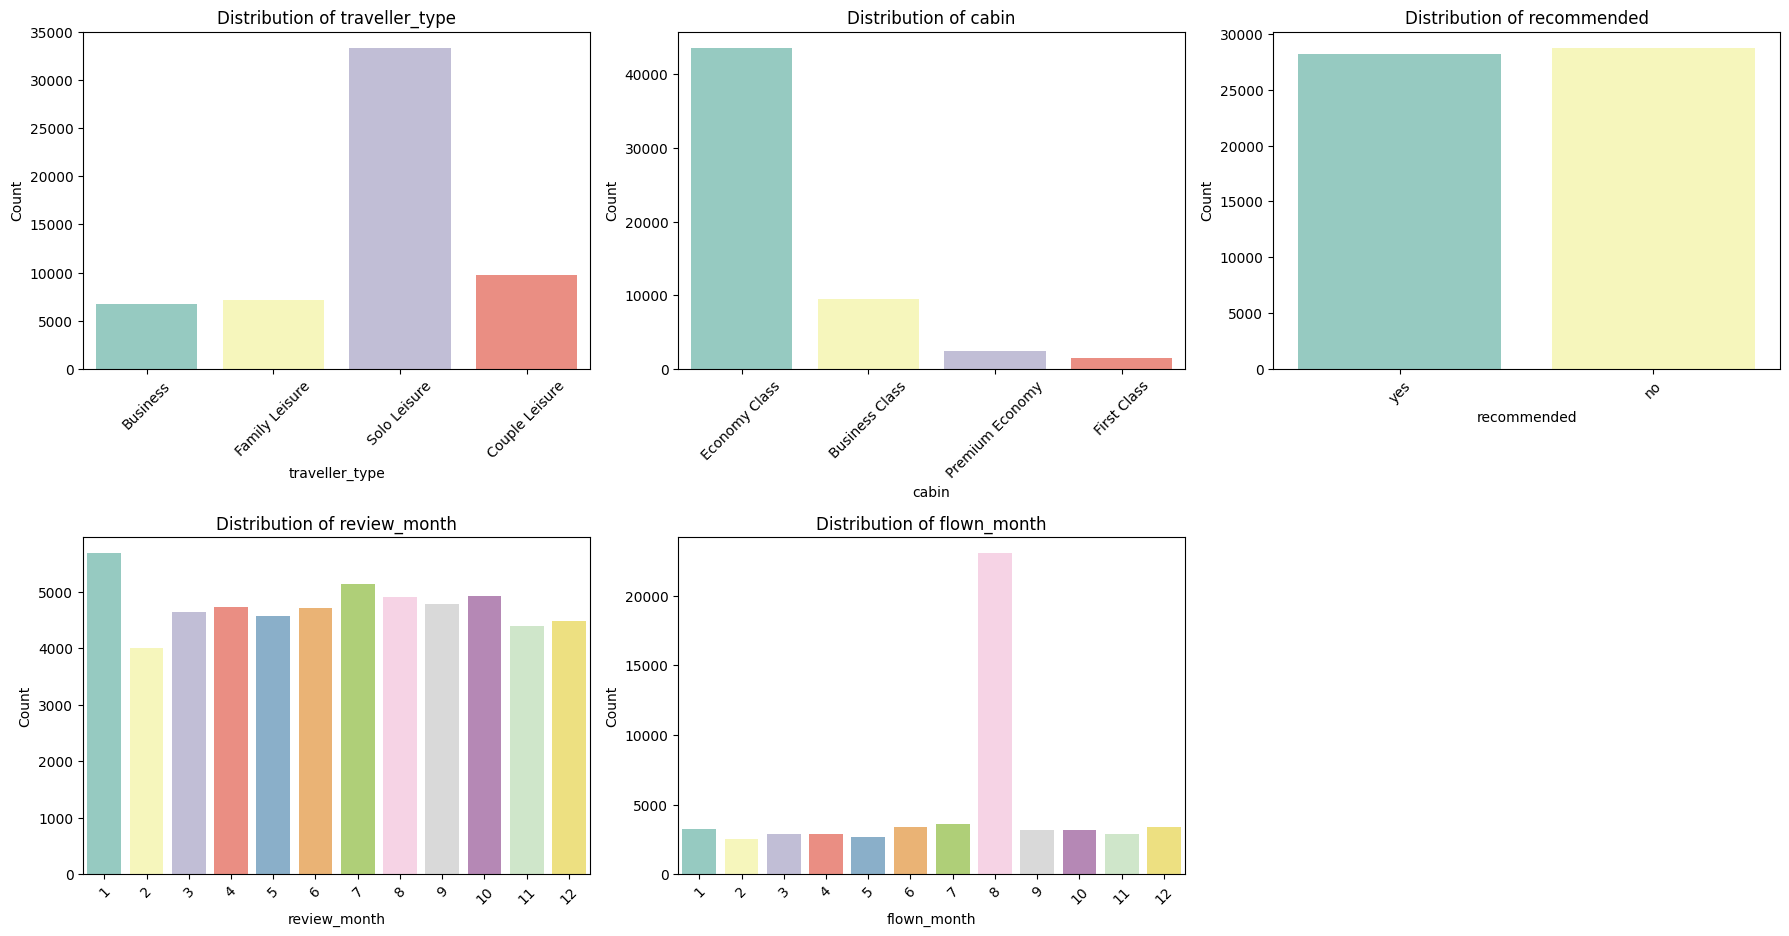

In [449]:
# Chart - 2 visualization code
#Distribution among some Categorical features?

# Categorical columns to visualize
categorical_columns = [ 'traveller_type', 'cabin', 'recommended', 'review_month', 'flown_month']

# Set up subplots
plt.figure(figsize=(18, 14))

# Create count plots for each categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=airline_data, x=column, palette='Set3')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



##### 1. Why did you pick the specific chart?

Count plots (bar plots) were chosen for visualizing the distribution among categorical features due to their effectiveness in representing category frequency, enabling easy comparisons and providing precise count information. The 'Set3' palette was selected to enhance visual appeal, and labels were rotated by 45 degrees for improved readability. These plots offer a clear and concise way to understand the distribution of categorical data and identify patterns and trends within the dataset, making them a suitable choice for this visualization task.

##### 2. What is/are the insight(s) found from the chart?

Insights gained from the count plots of categorical features include:

1. **Traveller Types:** Most reviews are from Solo Leisure travelers, indicating a higher representation of this category.

2. **Cabin Types:** "Economy" is more commonly reviewed, while "First" class reviews are relatively less frequent.

3. **Recommendation:** The "Recommended" feature shows mixed opinions as the values for "Yes" and "No" are similar, indicating a balance between passengers who recommend and those who do not.

4. **Review Months:** Reviews are fairly evenly distributed across different months of the year.

5. **Flight Months:** Flight reviews are relatively consistent, but there is a noticeable increase in August (month 8).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the count plots of categorical features can potentially help create a positive business impact, but there are also insights that may raise concerns related to negative growth.

**Positive Business Impact:**

1. **Diverse Traveller Types:** The high representation of "Solo Leisure" travelers suggests that airlines can cater to this segment with tailored services and marketing efforts, potentially increasing customer satisfaction and loyalty among solo leisure travelers.

2. **Economy Cabin Preference:** The prevalence of reviews for the "Economy" cabin indicates a strong customer base for this class. Airlines can focus on improving and promoting their economy class services to attract and retain customers.

3. **Recommendation Mixed Opinions:** The mixed opinions on recommendations ("Yes" and "No" values) imply that airlines should pay attention to customer feedback and address areas where improvements are needed. By addressing negative feedback, airlines can enhance their overall customer experience and potentially boost positive recommendations.

**Negative Growth:**

1. **Recommendation Mixed Opinions:** While the mixed recommendations provide an opportunity for improvement, they also raise concerns. If negative feedback is not addressed promptly, it may lead to negative growth as dissatisfied customers may choose competitors or discourage others from using the airline's services.

2. **August Flight Peak:** The increase in flight reviews in August suggests higher passenger volume during that month. Airlines should be prepared for peak travel seasons to ensure a smooth experience for passengers. Failure to manage peak demand could result in negative growth if service quality deteriorates during busy periods.



#### Chart - 3

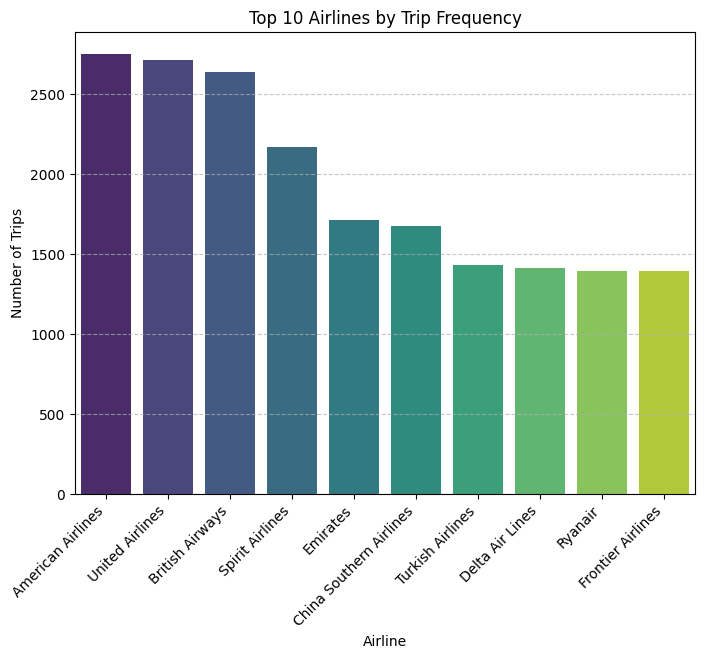

In [450]:
# Chart - 3 visualization code
#Question-3 : Which are the top 10 airlines in terms of the number of trips recorded?


# Calculate the number of trips for each airline
top_airlines = airline_data['airline'].value_counts().nlargest(10)

# Create a bar plot to visualize the top 10 airlines by trip frequency
plt.figure(figsize=(8, 6))
sns.barplot(x=top_airlines.index, y=top_airlines.values, palette="viridis")
plt.title('Top 10 Airlines by Trip Frequency')
plt.xlabel('Airline')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

The bar plot was selected to visualize the top 10 airlines based on the number of recorded trips. It offers an effective means of comparing trip frequencies among airlines, displaying them in descending order for clear identification of the top performers. The "viridis" palette enhances visual distinction, while rotated labels aid readability. This choice allows for a concise and straightforward representation of the airlines with the highest trip frequencies, catering to easy interpretation and analysis of the data.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the bar plot of the top 10 airlines by the number of recorded trips are as follows:

 American Airlines has the highest number of recorded trips among all airlines, indicating its significant presence in the dataset.United Airlines and British Airlines are the second and third highest in terms of trip frequency, demonstrating their substantial representation.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from identifying the top airlines by the number of recorded trips can potentially have both positive and negative implications for airlines and their business impact:

**Positive Business Impact:**

1. **Visibility and Dominance:** Airlines that rank at the top, such as American Airlines, United Airlines, and British Airlines, gain visibility and demonstrate their dominance in the market. This can be leveraged for marketing and promotion, attracting more customers and enhancing brand reputation.

2. **Market Share:** Airlines with a significant number of recorded trips can leverage their market share to negotiate better deals with airports, suppliers, and partners, potentially leading to cost savings.

**Negative Growth Concerns:**

1. **Competition:** The dominance of a few airlines at the top might indicate stiff competition, making it challenging for smaller or newer airlines to gain a foothold in the market. This could hinder growth opportunities for new entrants.

2. **Market Dependency:** Airlines with a high number of recorded trips might become overly dependent on certain routes or markets. Any disruptions in those areas, such as economic downturns or travel restrictions, could negatively impact their growth and revenue.



#### Chart - 4

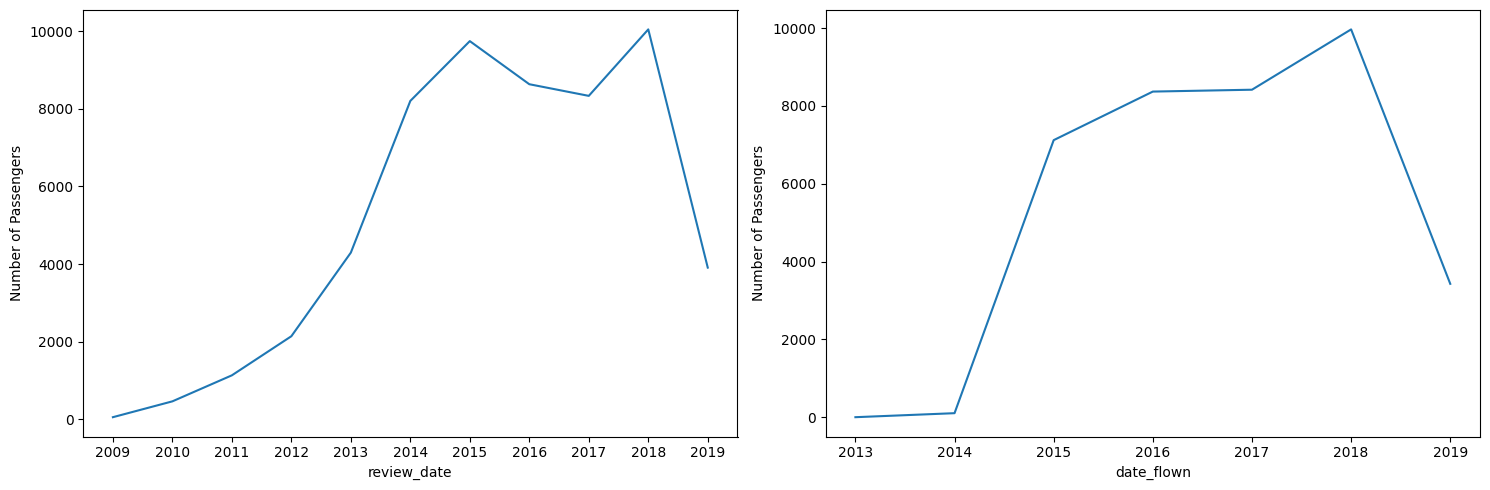

In [501]:
# Chart - 4 visualization code
#Question-4: What is the historical passenger trend based on review dates and flight dates, and how do they differ?
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
airline_df.groupby(airline_data.review_date.dt.year)['review_date'].count().plot(ylabel='Number of Passengers',xticks=range(2009,2020))

plt.subplot(1,2,2)
airline_df.groupby(airline_data.date_flown.dt.year)['date_flown'].count().plot(ylabel='Number of Passengers',xticks=range(2013,2020))

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The line plot was chosen for visualizing historical passenger trends based on review dates and flight dates because it effectively showcases temporal patterns over the years and allows for a direct comparison between the two trends, offering insights into passenger counts' evolution over time.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the line plot depicting historical passenger trends based on review dates and flight dates are as follows:

1. **Review Dates Trend:** Over the years, there is a noticeable increase in the number of passenger reviews, with a significant uptick from around 2013 onwards. However, there is a slight decrease in reviews in late 2016 and early 2017, followed by a resurgence in 2018. This suggests an increasing trend in customer feedback and engagement with the airline's services.

2. **Flight Dates Trend:** Over the years, there is a noticeable increase in the number of passengers who traveled, with a significant uptick from around 2014 onwards and another peak in 2018. The trend in the number of passengers based on flight dates is relatively consistent over the years, with slight variations. While there is no significant upward or downward trend, the number of passengers remains relatively stable.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the historical passenger trend analysis based on review dates and flight dates have the potential to create a positive business impact. However, there are also insights that could raise concerns related to negative growth. Let's examine both aspects:

**Positive Business Impact:**

1. **Increasing Customer Engagement:** The significant increase in passenger reviews over the years indicates that customers are increasingly engaging with the airline's services. This presents an opportunity for airlines to harness this feedback for service improvements and build stronger customer relationships, ultimately leading to positive business impact.

2. **Stable Passenger Count:** The relatively stable trend in the number of passengers based on flight dates, with occasional peaks, suggests that the airline has maintained a consistent customer base. This stability provides a foundation for reliable revenue streams and operational planning.

**Negative Growth:**

1. **Review Fluctuations:** The fluctuations in review counts, such as the slight decrease in late 2016 and early 2017, followed by a resurgence, could potentially indicate issues or disruptions that negatively impacted customer experiences. Unaddressed concerns from these periods could lead to negative growth if not addressed promptly.

2. **Limited Passenger Growth:** While the number of reviews has increased significantly, the actual number of passengers based on flight dates has remained relatively steady. This may indicate that the airline is not attracting a significantly larger customer base. Failing to expand the customer base could limit revenue growth in the long term.



#### Chart - 6

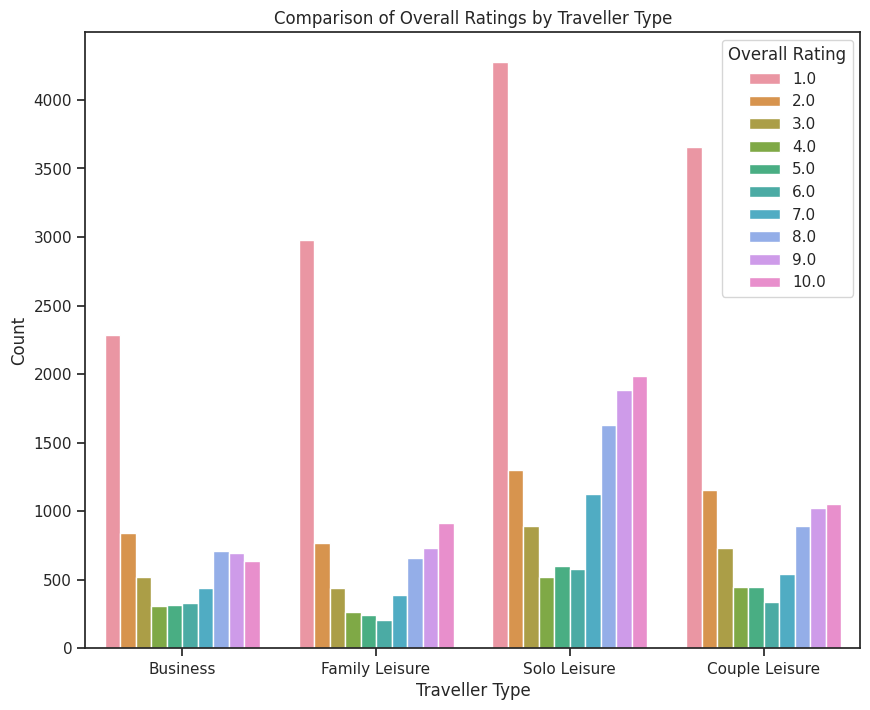

In [516]:
# Chart - 6 visualization code

#Question-6: how does overall rating effects traveller_type ?

# Set the color palette
sns.set_palette('crest')

# Create a grouped bar plot to compare overall ratings by traveller_type
plt.figure(figsize=(10, 8))
sns.countplot(data=airline_df, x='traveller_type', hue='overall')
plt.title('Comparison of Overall Ratings by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Count')
plt.legend(title='Overall Rating')

# Show the plot
plt.show()




##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

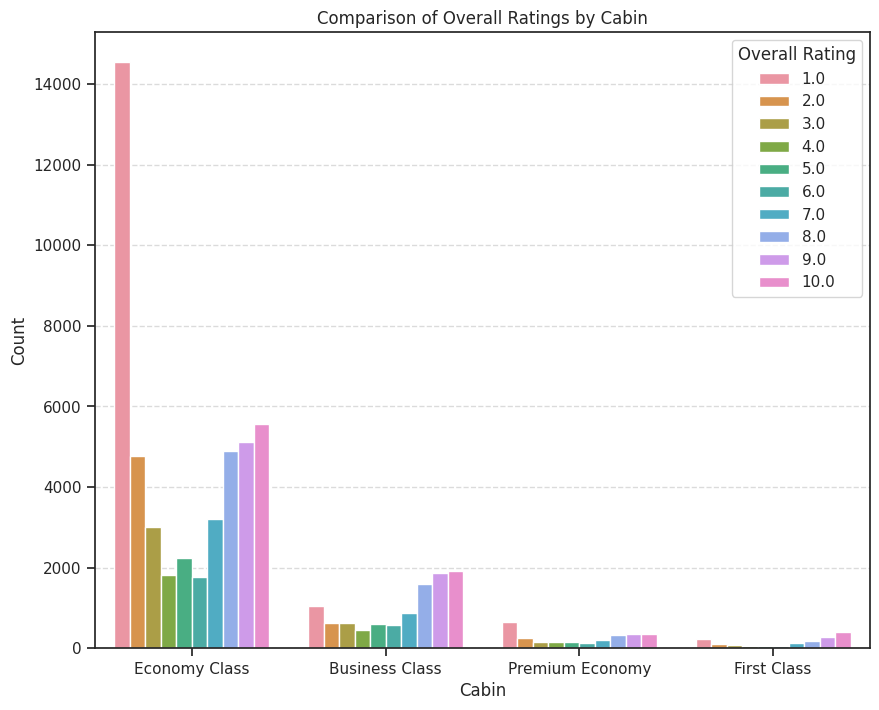

In [517]:
# Chart - 7 visualization code
#Question-6: how does overall rating effects cabin ?

# Set the color palette
sns.set_palette('crest')

# Create a grouped bar plot to compare overall ratings by traveller_type
plt.figure(figsize=(10, 8))
sns.countplot(data=airline_df, x='cabin', hue='overall')
plt.title('Comparison of Overall Ratings by Cabin')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.legend(title='Overall Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

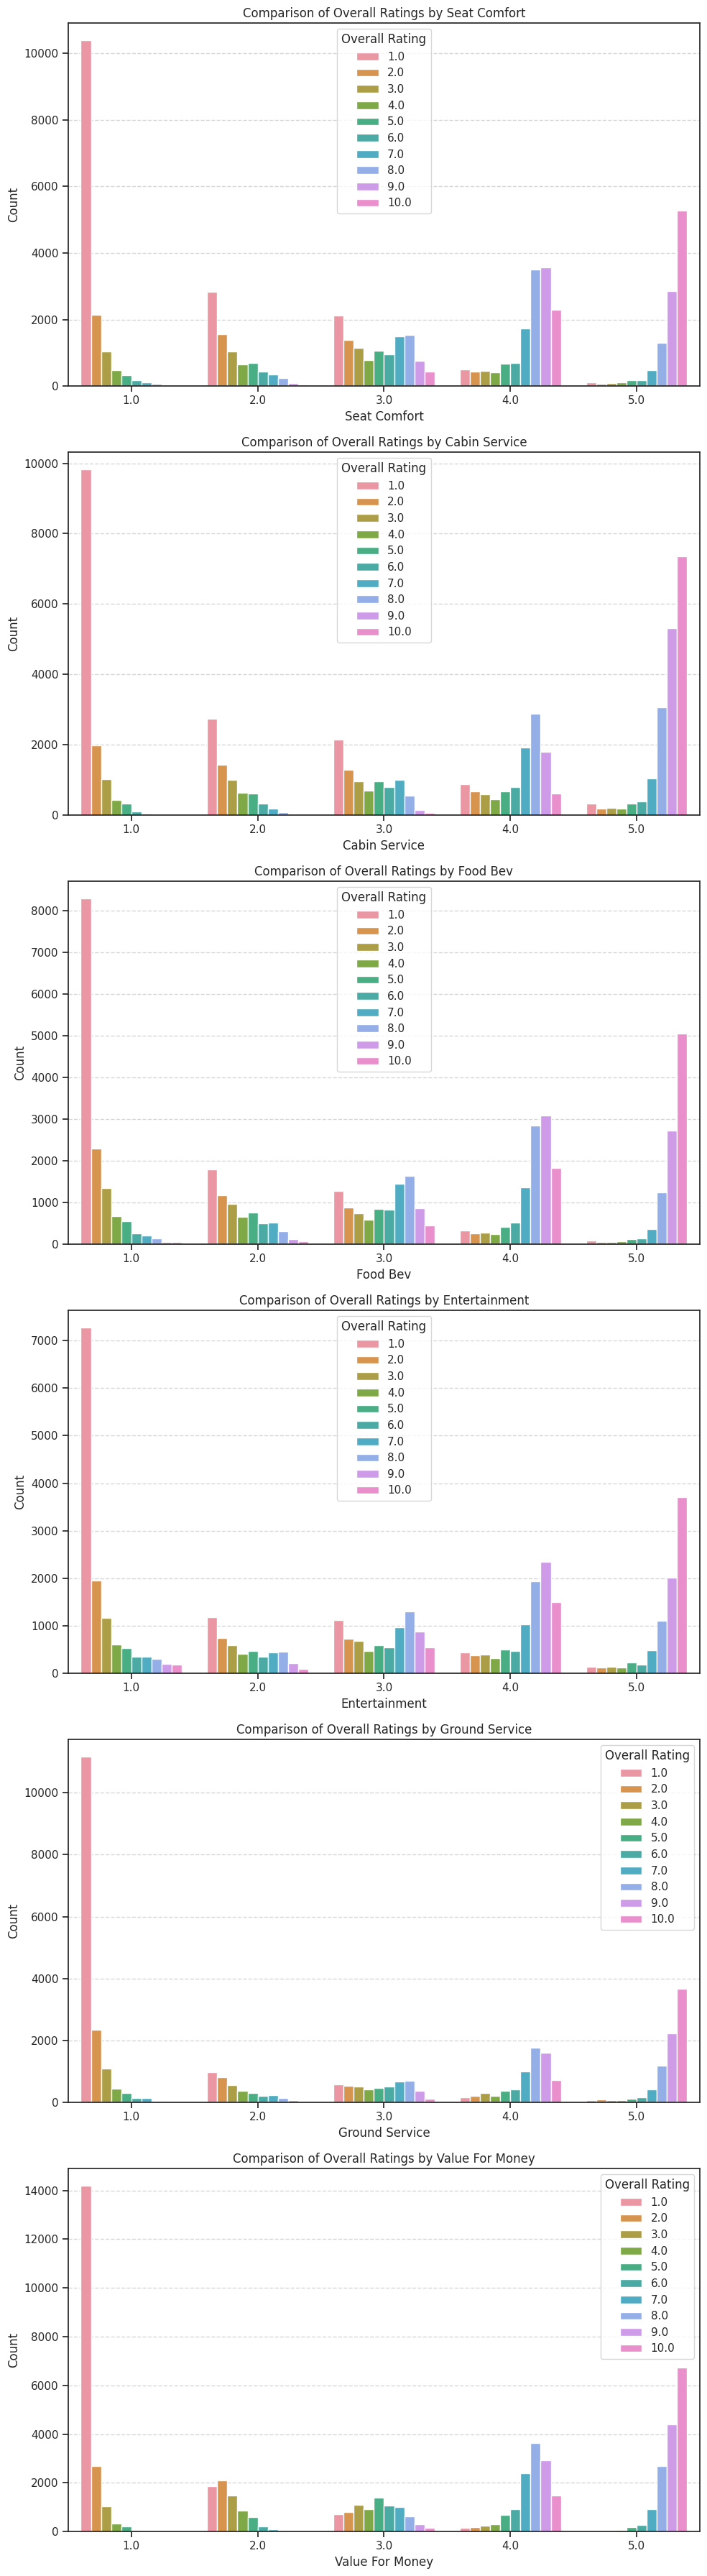

In [524]:
# Chart - 8 visualization code
#Question-8:How does overall rating affected by other ratings?


# List of ratings columns to compare with 'overall'
ratings_columns = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Set the color palette
sns.set_palette('crest')

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(ratings_columns), ncols=1, figsize=(10, 6 * len(ratings_columns)))

# Loop through each ratings column and create a count plot
for i, column in enumerate(ratings_columns):
    ax = axes[i]
    sns.countplot(data=airline_df, x=column, hue='overall', ax=ax)
    ax.set_title(f'Comparison of Overall Ratings by {column.replace("_", " ").title()}')
    ax.set_xlabel(column.replace("_", " ").title())
    ax.set_ylabel('Count')
    ax.legend(title='Overall Rating')
    ax.grid(axis='y', linestyle='--', alpha=0.8)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

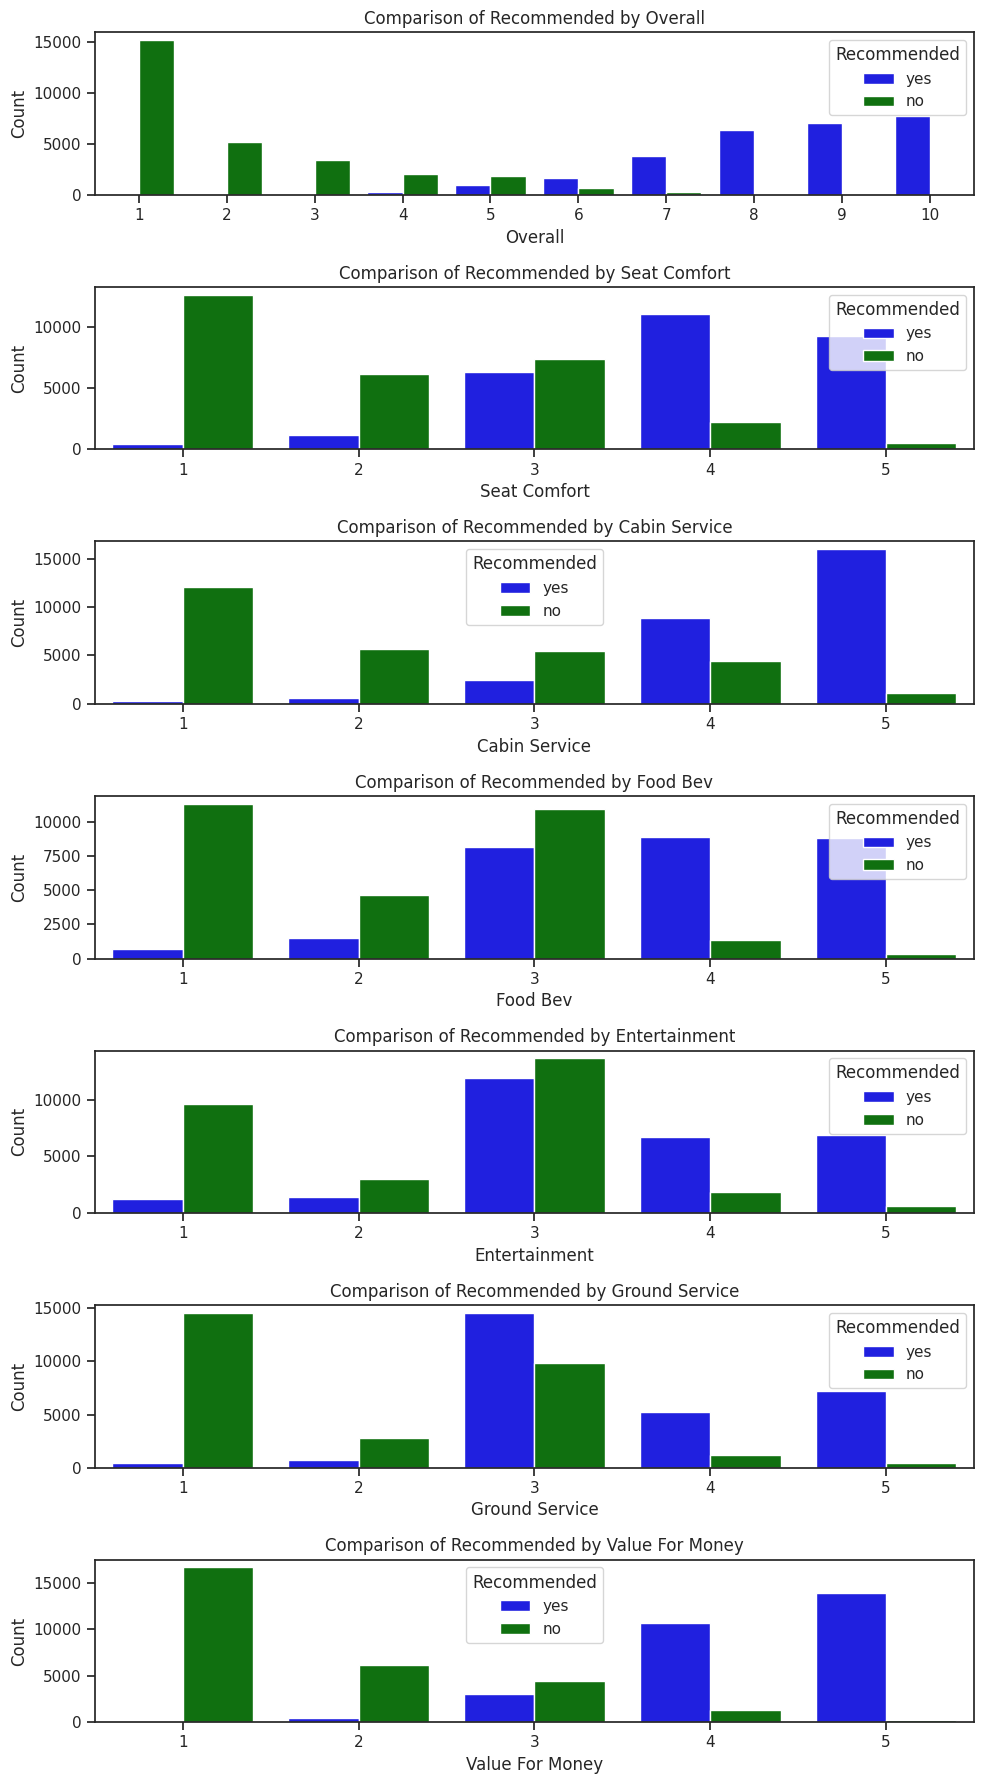

In [529]:
# Chart - 9 visualization code
#Question-9:How does recommended affected by all types of ratings?

# List of ratings columns to compare with 'recommended'
ratings_columns = ['overall','seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']


# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(ratings_columns), ncols=1, figsize=(10, 18))

# Loop through each ratings column and create a count plot
for i, column in enumerate(ratings_columns):
    ax = axes[i]
    sns.countplot(data=airline_data, x=column, hue='recommended',palette=["blue","green"], ax=ax)
    ax.set_title(f'Comparison of Recommended by {column.replace("_", " ").title()}')
    ax.set_xlabel(column.replace("_", " ").title())
    ax.set_ylabel('Count')
    ax.legend(title='Recommended')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

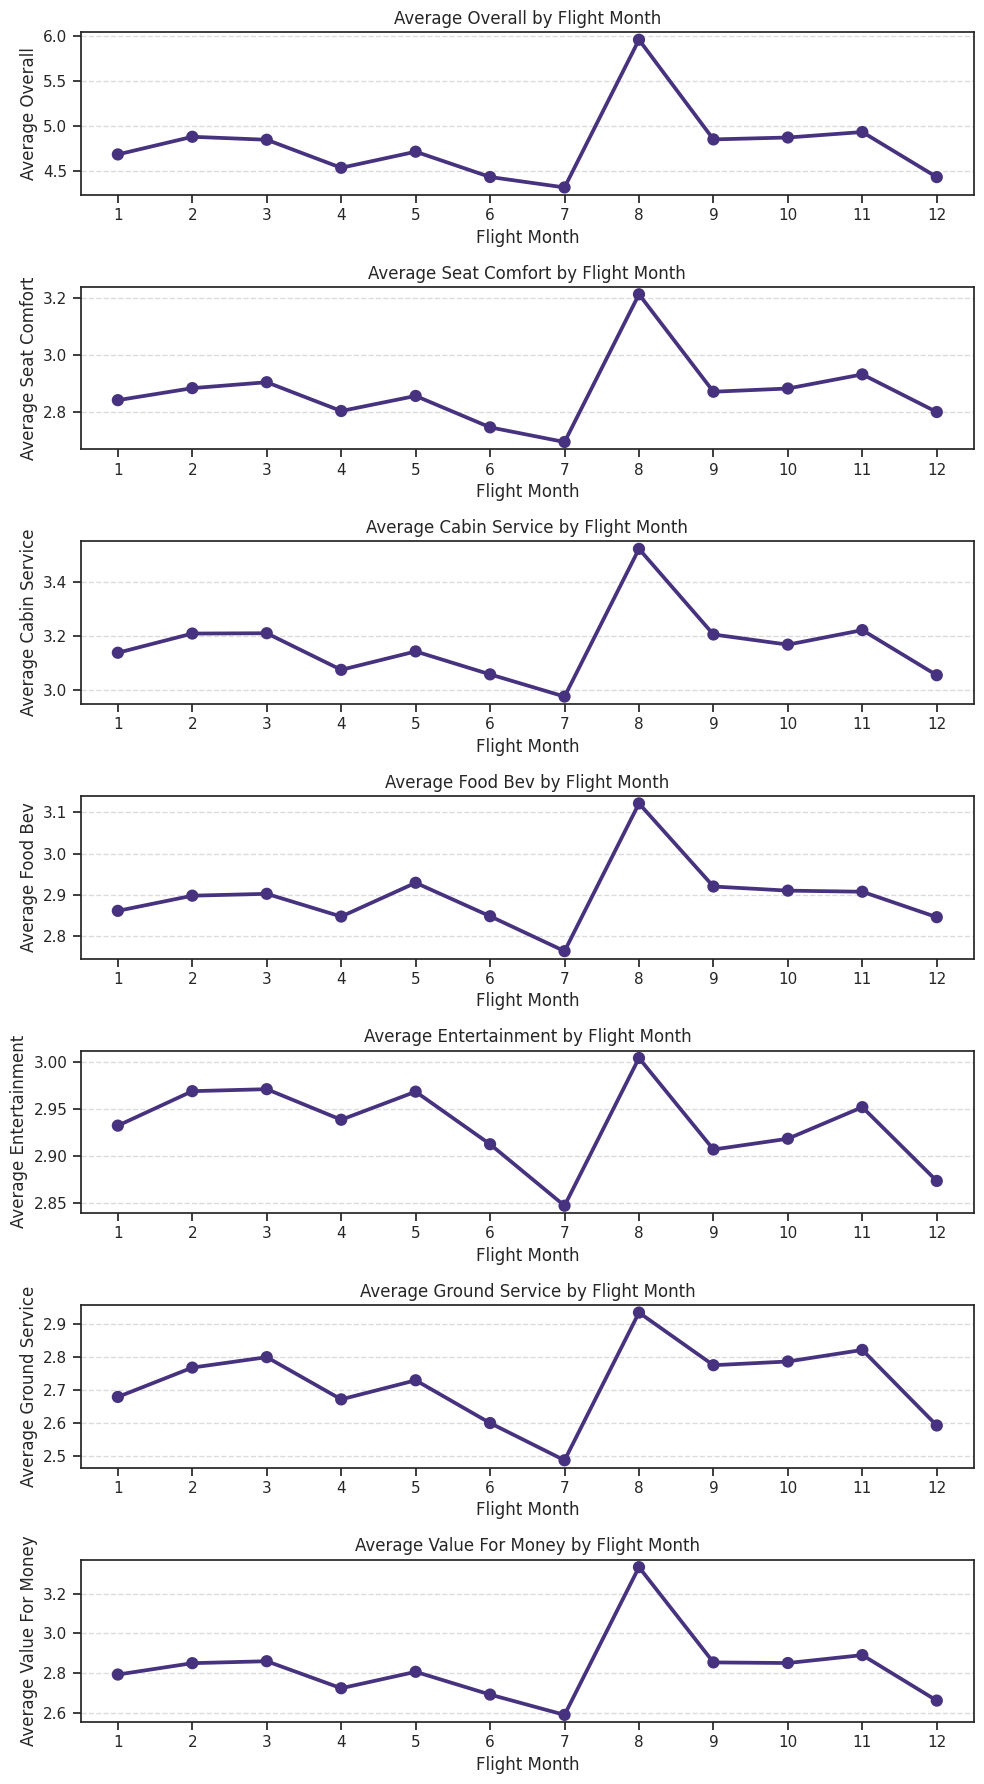

In [537]:
# Chart - 10 visualization code

# List of ratings columns to analyze
ratings_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Set the color palette
sns.set_palette('viridis')

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(ratings_columns), ncols=1, figsize=(10, 18))

# Loop through each ratings column and create a point plot
for i, column in enumerate(ratings_columns):
    ax = axes[i]
    sns.pointplot(data=airline_data, x='flown_month', y=column, ci=None, ax=ax)
    ax.set_title(f'Average {column.replace("_", " ").title()} by Flight Month')
    ax.set_xlabel('Flight Month')
    ax.set_ylabel(f'Average {column.replace("_", " ").title()}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)


# Adjust layout and show the plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

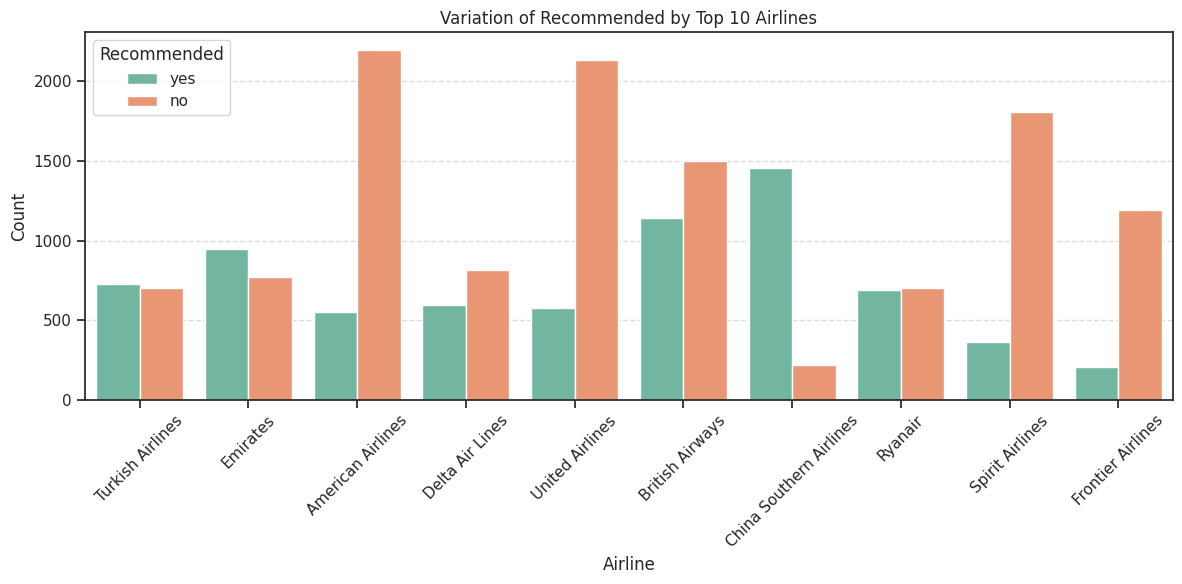

In [548]:
# Chart - 11 visualization code
#Question-11: how recommended feature varies for top airlines?


# Get the top 10 airlines with the highest counts
top_10_airlines = airline_data['airline'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 airlines
top_10_airlines_data = airline_data[airline_data['airline'].isin(top_10_airlines)]

# Set the color palette
sns.set_palette('Set2')

# Create a count plot to visualize recommendations for the top 10 airlines
plt.figure(figsize=(12, 6))
sns.countplot(data=top_10_airlines_data, x='airline', hue='recommended')
plt.title('Variation of Recommended by Top 10 Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Recommended')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

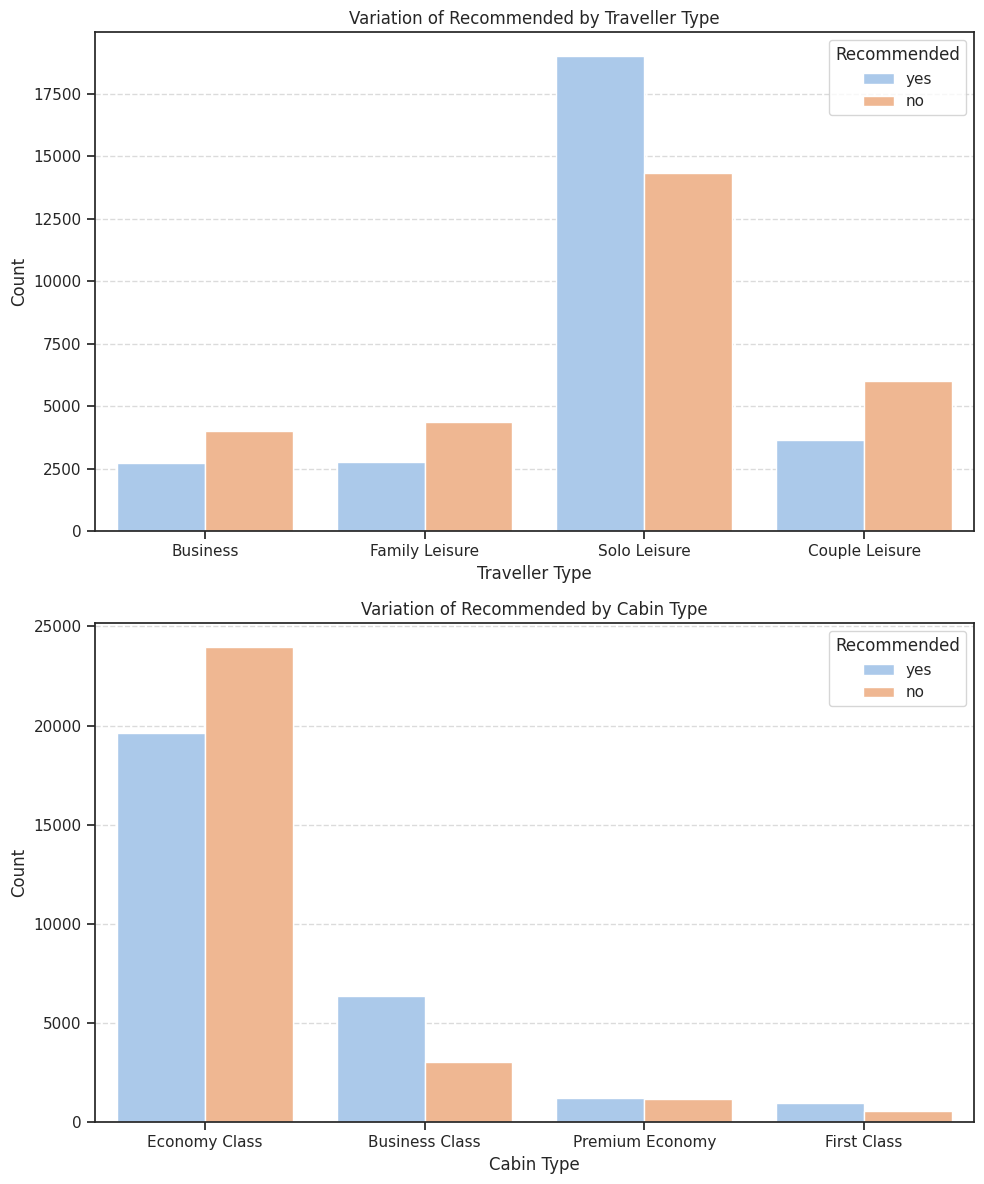

In [551]:
# Chart - 12 visualization code
#Question-12:how recommended feature varies for traveller_type and cabin?

# Set the color palette
sns.set_palette('pastel')

# Create a grid of subplots for 'traveller_type' and 'cabin'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Create a count plot for 'recommended' vs. 'traveller_type'
sns.countplot(data=airline_data, x='traveller_type', hue='recommended', ax=axes[0])
axes[0].set_title('Variation of Recommended by Traveller Type')
axes[0].set_xlabel('Traveller Type')
axes[0].set_ylabel('Count')
axes[0].legend(title='Recommended')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Create a count plot for 'recommended' vs. 'cabin'
sns.countplot(data=airline_data, x='cabin', hue='recommended', ax=axes[1])
axes[1].set_title('Variation of Recommended by Cabin Type')
axes[1].set_xlabel('Cabin Type')
axes[1].set_ylabel('Count')
axes[1].legend(title='Recommended')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout and show the plots
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [460]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

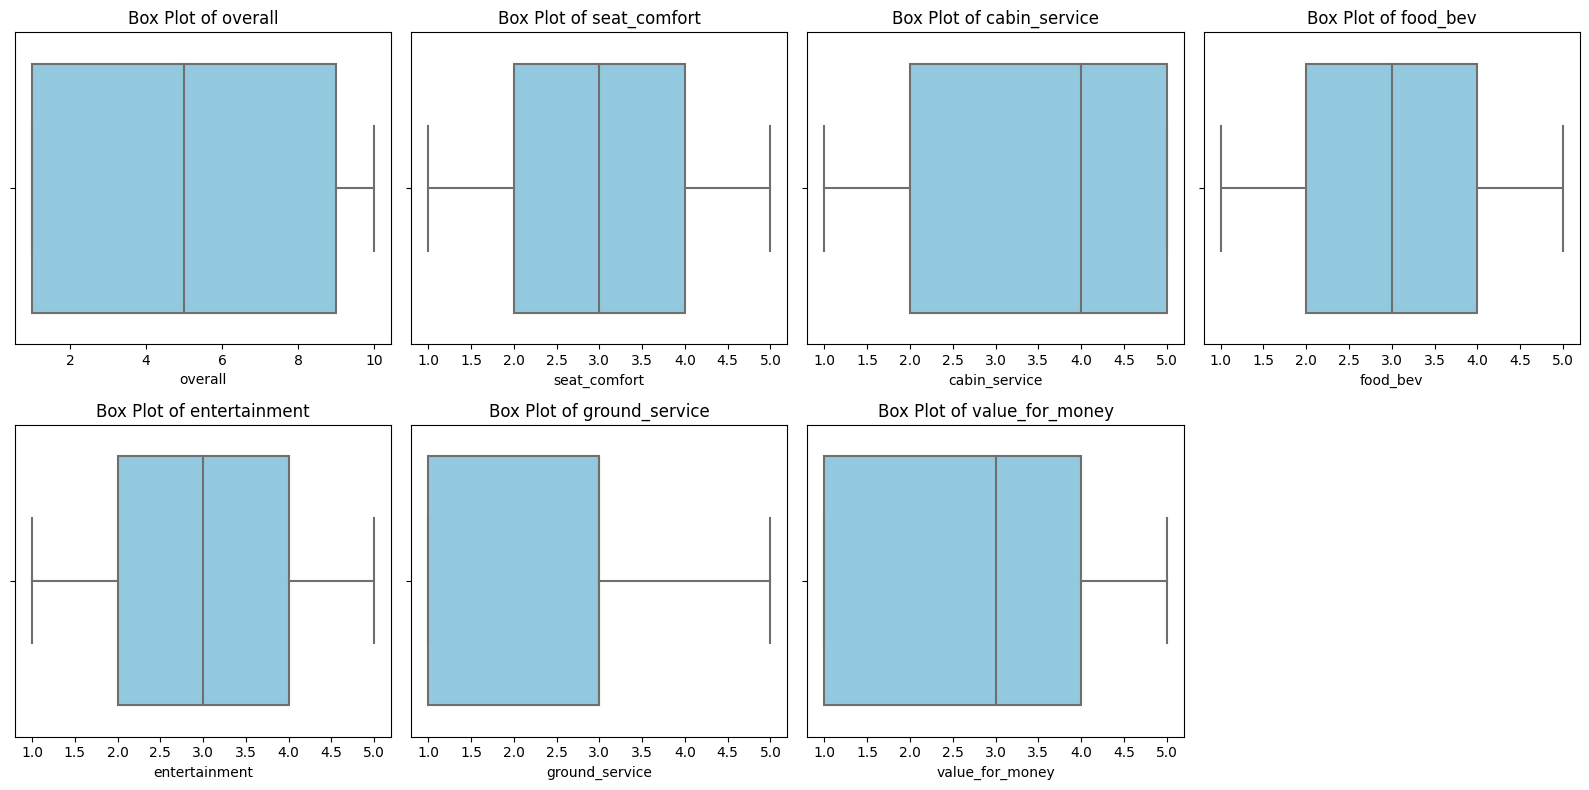

In [ ]:
# Chart - 3 visualization code
#Question-3 : is there any outlier present in the data?

# List of numerical columns to check for outliers
numerical_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Set up subplots for each numerical column
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=airline_data[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

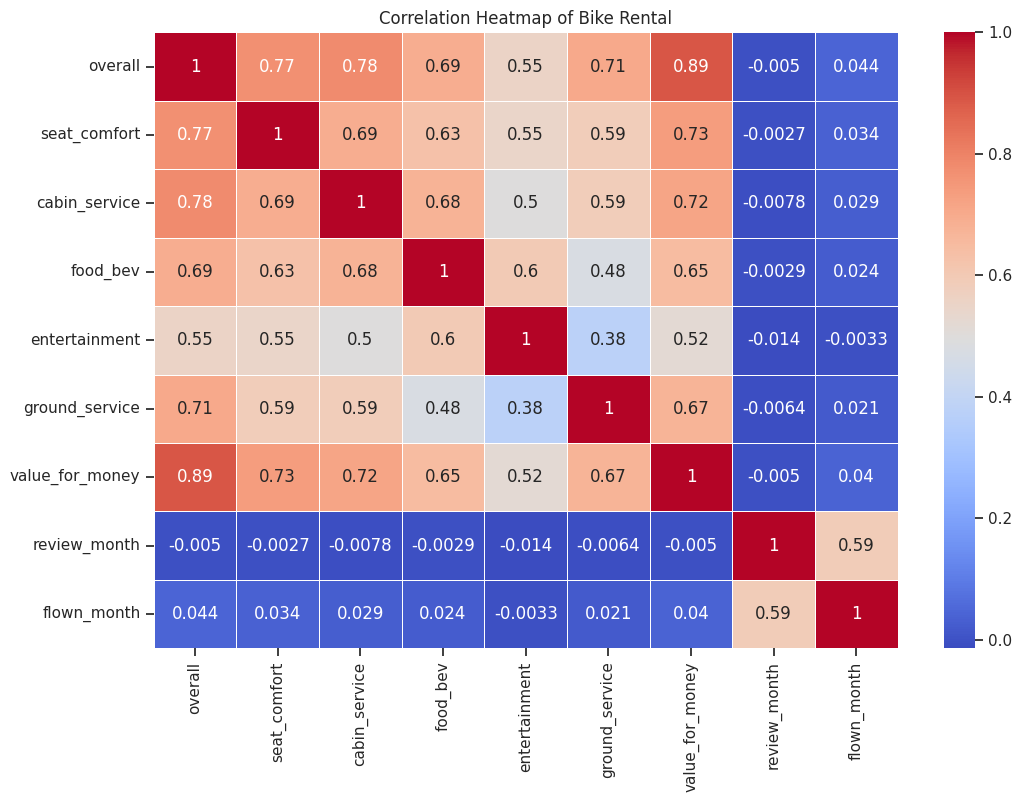

In [553]:
# Correlation Heatmap visualization code
numeric = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money','review_month','flown_month']
corelation=airline_data[numeric].corr()
# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corelation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Bike Rental')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

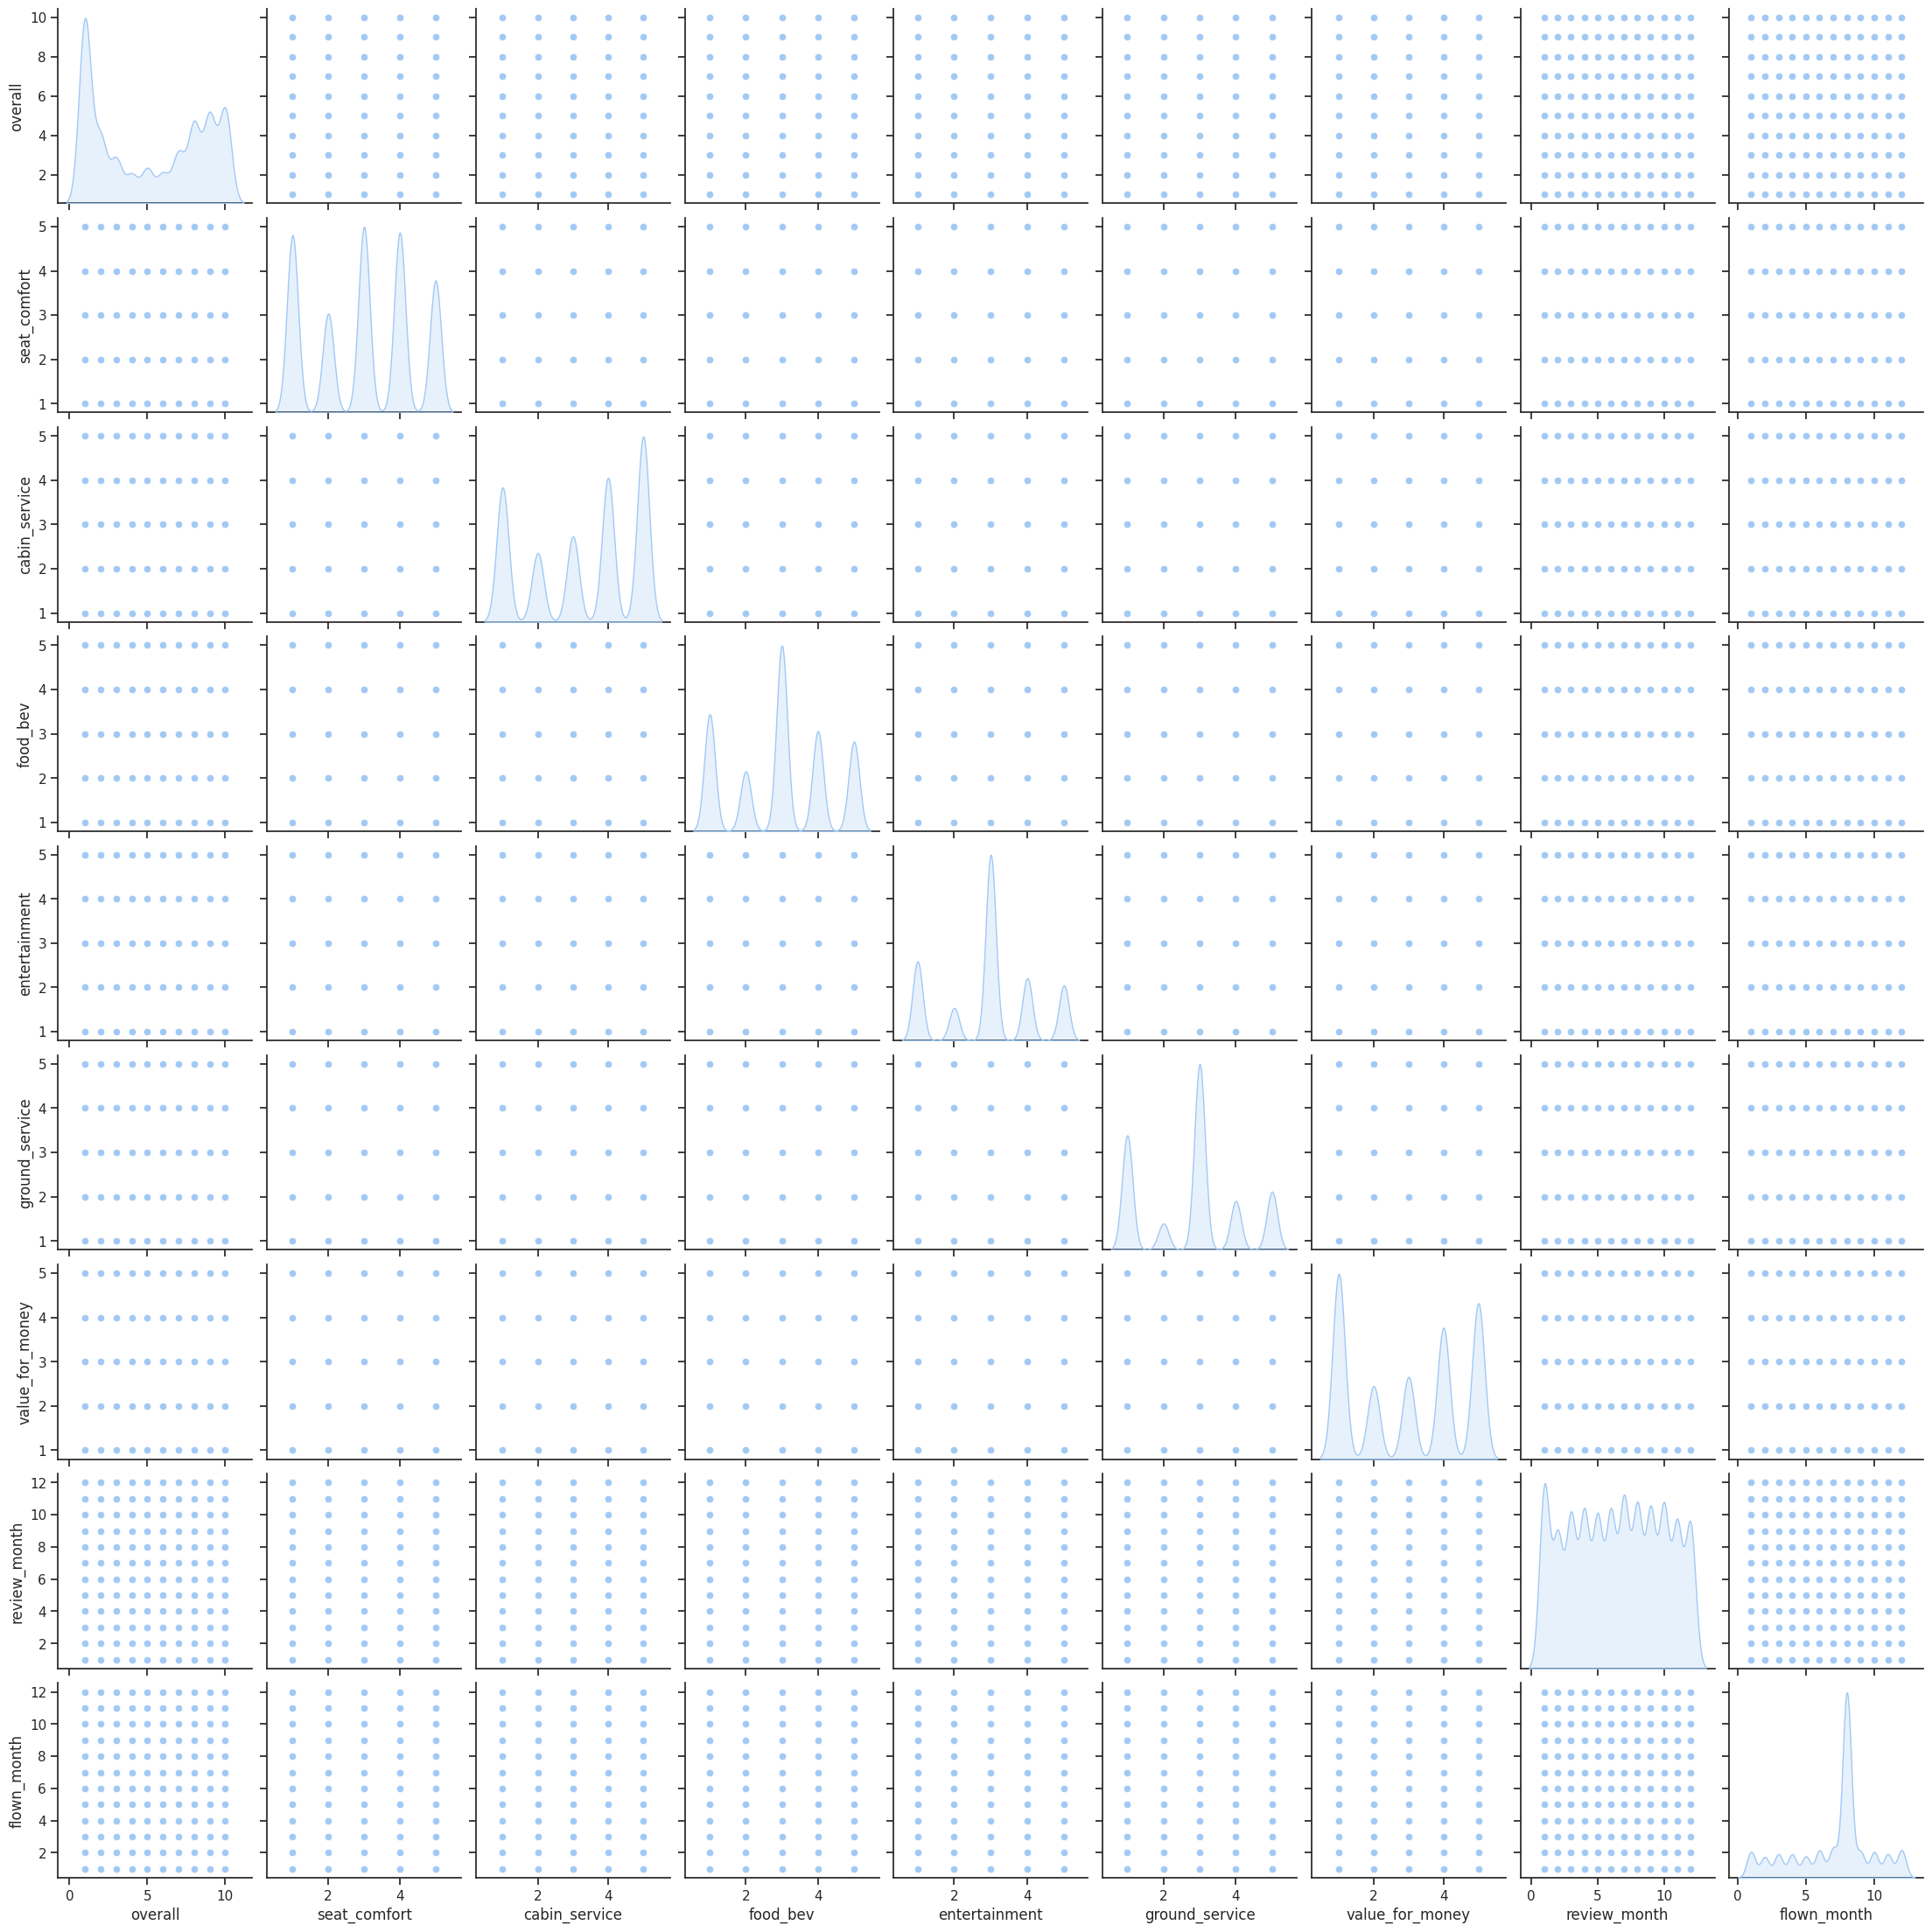

In [554]:
# Pair Plot visualization code
# Create a pair plot using seaborn
sns.pairplot(airline_data[numeric],diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [463]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [464]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [465]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [466]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [467]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [468]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [469]:
# Expand Contraction

#### 2. Lower Casing

In [470]:
# Lower Casing

#### 3. Removing Punctuations

In [471]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [472]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [473]:
# Remove Stopwords

In [474]:
# Remove White spaces

#### 6. Rephrase Text

In [475]:
# Rephrase Text

#### 7. Tokenization

In [476]:
# Tokenization

#### 8. Text Normalization

In [477]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [478]:
# POS Taging

#### 10. Text Vectorization

In [479]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [480]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [481]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [482]:
# Transform Your data

### 6. Data Scaling

In [483]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [484]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [485]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [486]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [487]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [488]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [489]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [490]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [491]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [492]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [493]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [494]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [495]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [496]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***